# 神經網路

## Activate Functions

今天要來介紹活化函數。
### sigmoid

$$
h(x) = \frac{1}{1+exp(-x)}
$$

sigmoid 是在做神經層的時候很常用到的活化函數，他的輸出範圍在 0 ~ 1 之間，並且在中間值時的時候輸出變化較大，在靠近 0, 1 的時候變化逐漸平滑。

In [13]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from PIL import Image


In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784) (60000,)
(10000, 784) (10000,)


來看看 train set 的圖片長怎樣

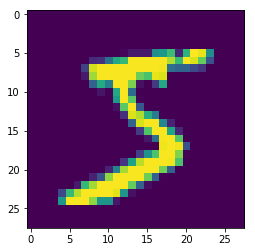

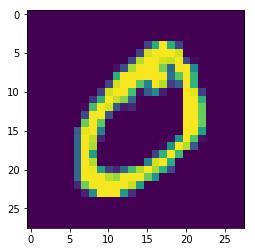

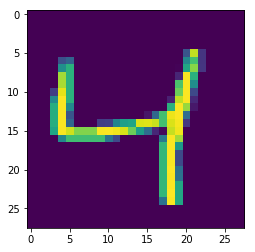

In [26]:
def show_img(img):
    plt.imshow(img)
    plt.show()

img = x_train[0].reshape(28, 28)
img2 = x_train[1].reshape(28, 28)
img3 = x_train[2].reshape(28, 28)
show_img(img)
show_img(img2)
show_img(img3)


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(np.array([-1.0, 1.0, 2.0])))

[ 0.26894142  0.73105858  0.88079708]


我們把 sigmoid 圖形用 matplotlib 畫出來看看

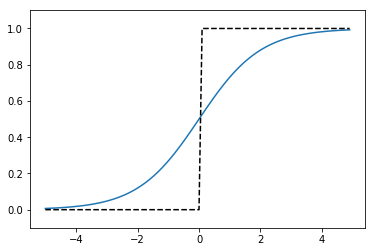

In [28]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1)
plt.show()


### ReLU

最近開始比較常用的活化函數是 ReLU，他的函數非常簡單：

$$
h(x) = \begin{cases}
    x       & \text{if } x > 0 \\
    0  & \text{if } x <= 0
  \end{cases}
$$

至於為什麼那麼好用呢？我想可能是因為函數簡單，且他的導數也相當單純。

In [4]:
def relu(x):
    return np.maximum(x, 0)

print(relu(np.array([1,2,3,4,-1, -1, -1])))

[1 2 3 4 0 0 0]


In [5]:
A = np.array([[1,2], [3,4]])
print(np.shape(A))

B = np.array([[5,6],[7,8]])

C = np.dot(A, B)
print(C)

(2, 2)
[[19 22]
 [43 50]]


## numpy sum

numpy 的 sum 第二的參數有 `axis=0`，要注意

In [6]:
print(np.sum(np.arange(-2.0, 6.0, 0.1), axis=0))
print(np.sum(np.arange(-2.0, 6.0, 0.1)))
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
print(np.sum(scores)) # 計算全部的總和
print(np.sum(scores, axis=0))
print(np.sum(scores, axis=1))

156.0
156.0
115.0
[ -3.80000000e+00  -3.70000000e+00  -3.60000000e+00  -3.50000000e+00
  -3.40000000e+00  -3.30000000e+00  -3.20000000e+00  -3.10000000e+00
  -3.00000000e+00  -2.90000000e+00  -2.80000000e+00  -2.70000000e+00
  -2.60000000e+00  -2.50000000e+00  -2.40000000e+00  -2.30000000e+00
  -2.20000000e+00  -2.10000000e+00  -2.00000000e+00  -1.90000000e+00
  -1.80000000e+00  -1.70000000e+00  -1.60000000e+00  -1.50000000e+00
  -1.40000000e+00  -1.30000000e+00  -1.20000000e+00  -1.10000000e+00
  -1.00000000e+00  -9.00000000e-01  -8.00000000e-01  -7.00000000e-01
  -6.00000000e-01  -5.00000000e-01  -4.00000000e-01  -3.00000000e-01
  -2.00000000e-01  -1.00000000e-01  -1.34892097e-14   1.00000000e-01
   2.00000000e-01   3.00000000e-01   4.00000000e-01   5.00000000e-01
   6.00000000e-01   7.00000000e-01   8.00000000e-01   9.00000000e-01
   1.00000000e+00   1.10000000e+00   1.20000000e+00   1.30000000e+00
   1.40000000e+00   1.50000000e+00   1.60000000e+00   1.70000000e+00
   1.80000000e+0

### Softmax

最後輸出的時候，我們希望可以得到預測某個 label 的機率，這時通常會用 softmax 當作輸出函數。

$$
softmax(x) = \frac{exp(x_{j})}{\Sigma exp(X)}
$$

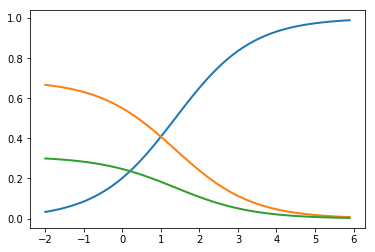

In [38]:
scores = [3.0, 1.0, 0.2]
def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x), axis=0)

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()